In [1]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4

Uninstalling Keras-2.4.3:
  Successfully uninstalled Keras-2.4.3
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 320.4MB 38kB/s 
     |████████████████████████████████| 460kB 46.1MB/s 
     |████████████████████████████████| 2.9MB 50.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 20.1MB 69.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling ten

     |████████████████████████████████| 174kB 7.1MB/s 


In [2]:
!nvidia-smi

Thu Jun 24 14:40:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Keras RetinaNet setup
importing the git repository

In [3]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


upgrade keras to latest update

In [4]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=169087 sha256=73ae6df0edfd9003bcd976375c57dc0c9c4d3036669cd698ed4dc9f11bb16311
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=4c279bac006c79129b2bf93632213575866c7b161a41410cde9502487bbefcb4
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


setup the model

In [5]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [6]:
!pip install gdown

Usefull libraries

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("Setup ready")



Setup ready


Upload dataset into a pands dataframe

In [8]:
!gdown --id 1mOK2qtcY9oNiAhWbOgvj4v8e9FuqcGIB 

Downloading...
From: https://drive.google.com/uc?id=1mOK2qtcY9oNiAhWbOgvj4v8e9FuqcGIB
To: /content/keras-retinanet/imgs.zip
935MB [00:10, 86.0MB/s]


In [9]:
!unzip imgs.zip

Archive:  imgs.zip
   creating: imgs/test/
  inflating: imgs/test/bookstore_video1_10020.jpg  
  inflating: imgs/test/bookstore_video1_10050.jpg  
  inflating: imgs/test/bookstore_video1_10080.jpg  
  inflating: imgs/test/bookstore_video1_10110.jpg  
  inflating: imgs/test/bookstore_video1_10140.jpg  
  inflating: imgs/test/bookstore_video1_10170.jpg  
  inflating: imgs/test/bookstore_video1_10200.jpg  
  inflating: imgs/test/bookstore_video1_10230.jpg  
  inflating: imgs/test/bookstore_video1_10260.jpg  
  inflating: imgs/test/bookstore_video1_10290.jpg  
  inflating: imgs/test/bookstore_video1_10320.jpg  
  inflating: imgs/test/bookstore_video1_10350.jpg  
  inflating: imgs/test/bookstore_video1_10380.jpg  
  inflating: imgs/test/bookstore_video1_10410.jpg  
  inflating: imgs/test/bookstore_video1_10440.jpg  
  inflating: imgs/test/bookstore_video1_10470.jpg  
  inflating: imgs/test/bookstore_video1_10500.jpg  
  inflating: imgs/test/bookstore_video1_10530.jpg  
  inflating: imgs/tes

In [10]:
%ls
os.makedirs("snapshots", exist_ok=True)
# %cd snapshots
# !gdown --id 1c9AcfRrfprAEH5G6lMuyj3rh6Ss539nT
# %cd ..

build/           imgs.zip          setup.cfg             tests/
CONTRIBUTORS.md  keras_retinanet/  setup.py              train_annotations.csv
examples/        LICENSE           snapshots/
images/          README.md         test_annotations.csv
imgs/            requirements.txt  test.csv


In [11]:
%cd snapshots
# !gdown --id 1iyi-MFDKAbHu5e2CTy--jQih0LbR40C5
!gdown --id 1Dp9_eAGlPcpAY38je0rbZfKFoCIZzV8Q
%cd ..

/content/keras-retinanet/snapshots
Downloading...
From: https://drive.google.com/uc?id=1Dp9_eAGlPcpAY38je0rbZfKFoCIZzV8Q
To: /content/keras-retinanet/snapshots/resnet50_csv_85.h5
438MB [00:03, 143MB/s]
/content/keras-retinanet


In [12]:
df = pd.read_csv('train_annotations.csv')
df.head()

,imgs/train/bookstore_video0_40.jpg,763,899,806,940,Person
0,imgs/train/bookstore_video0_40.jpg,848,174,891,219,Person
1,imgs/train/bookstore_video0_40.jpg,399,999,419,1031,Person
2,imgs/train/bookstore_video0_40.jpg,417,1033,446,1067,Person
3,imgs/train/bookstore_video0_40.jpg,587,976,626,1013,Person
4,imgs/train/bookstore_video0_40.jpg,895,253,949,303,Person


In [13]:
os.makedirs("humans", exist_ok=True)
df2 = pd.DataFrame(df)

In [ ]:
def show_image_objects(image_row):

  img_path = 'imgs/test/bookstore_video1_8100.jpg'
  box = [
    991 , 854, 1021, 883
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

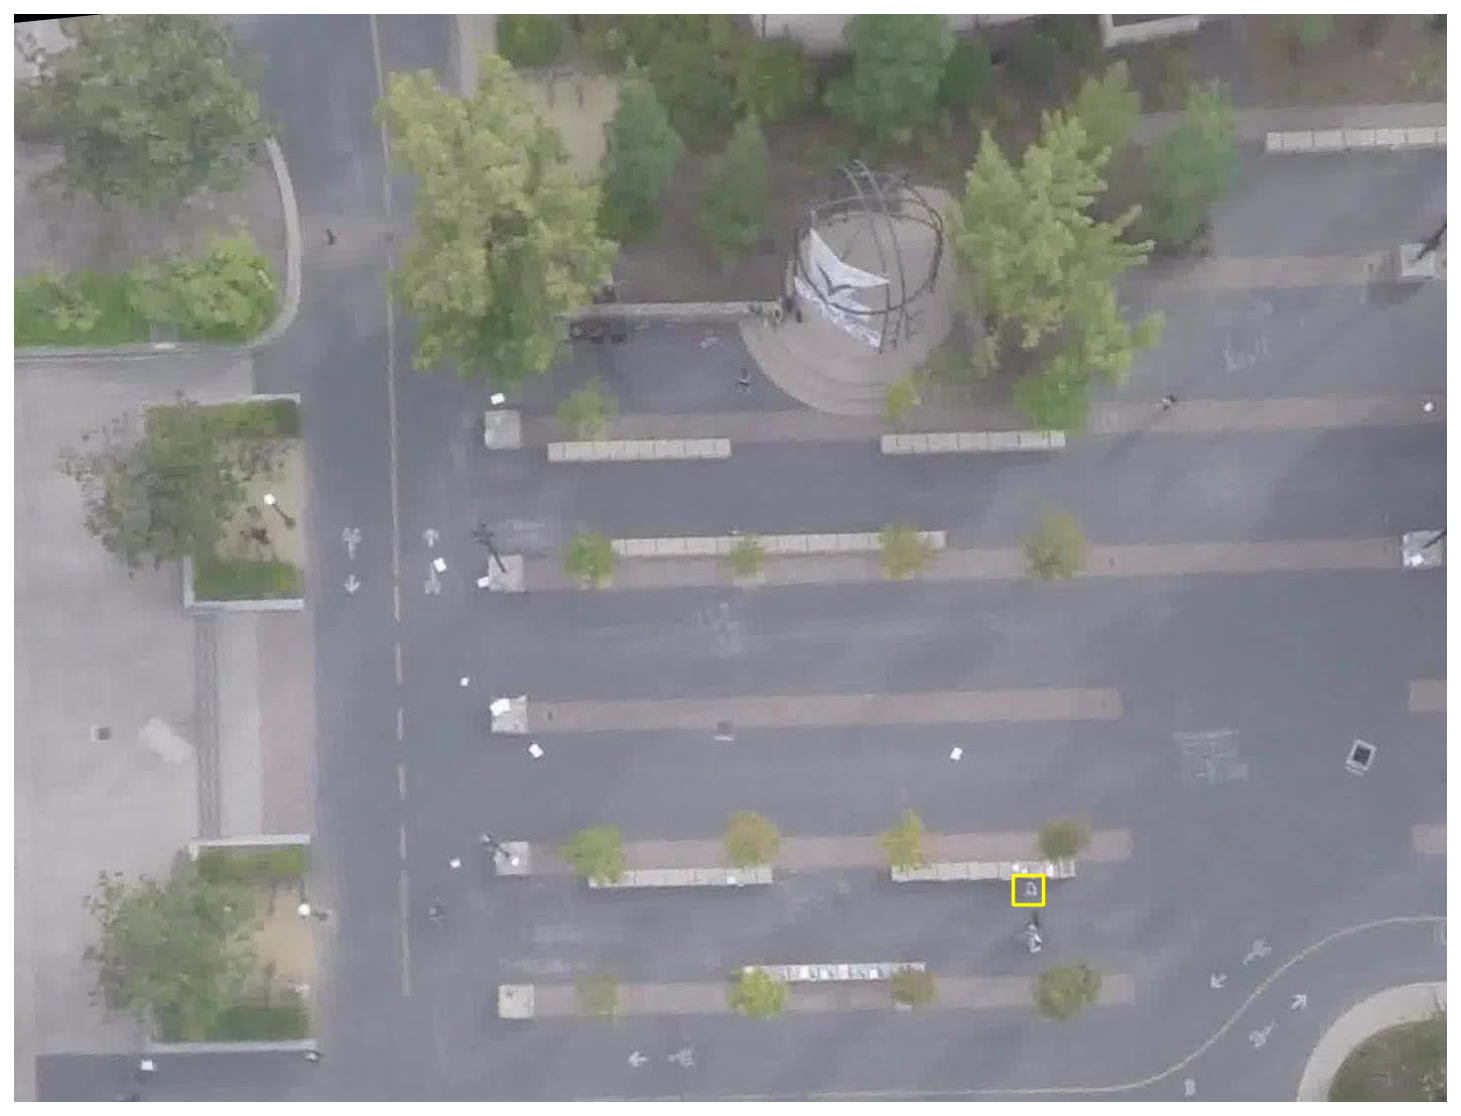

In [ ]:
show_image_objects(df.iloc[0])

#Training phase


In [14]:
train_df, test_df = train_test_split(df2, test_size=0.0001, random_state=RANDOM_SEED)
train_df.head()

,imgs/train/bookstore_video0_40.jpg,763,899,806,940,Person
30845,imgs/train/hyang_video5_8760.jpg,1132,991,1209,1099,Biker
1662,imgs/train/bookstore_video0_4080.jpg,895,691,947,723,Person
15731,imgs/train/deathCircle_video0_3480.jpg,957,1176,1039,1258,Biker
13904,imgs/train/deathCircle_video0_800.jpg,835,1741,878,1814,Biker
1786,imgs/train/bookstore_video0_4320.jpg,931,693,979,725,Person


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='train.csv')  
train_df.to_csv('out.zip', index=False,
          compression=compression_opts)

In [ ]:
!unzip out.zip

Archive:  out.zip
  inflating: train.csv               


In [15]:
ANNOTATIOS_FILE = 'train_annotations.csv'
CLASSES_FILE = 'classes.csv'

train_df.to_csv(ANNOTATIOS_FILE,index=False, header=None)

classes = set(['Person', 'Biker', 'Car', 'Bus'])

with open(CLASSES_FILE, 'w') as f:
	for i, line in enumerate(sorted(classes)):
		f.write('{}, {}\n'.format(line,i))

In [16]:
!head classes.csv

Biker, 0
Bus, 1
Car, 2
Person, 3


In [ ]:
def count_files(path):
    return sum([len(files) for _, _, files in os.walk(path)])

count_files('/content/keras-retinanet/imgs/train')

2612

In [ ]:
!wc -l train_annotations.csv

35673 train_annotations.csv


In [ ]:
!shuf -o shuffled-file1.csv < train_annotations.csv

In [ ]:
!keras_retinanet/bin/train.py \
--initial-epoch 65 \
--epochs 85 \
--steps 740 \
--batch-size 4 \
--config config.ini \
--snapshot snapshots/resnet50_csv_65.h5 \
csv train_annotations.csv classes.csv 

2021-05-25 14:38:43.508348: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-05-25 14:38:45.255135: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-25 14:38:45.308884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-25 14:38:45.309523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-25 14:38:45.309563: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.

In [ ]:
!keras_retinanet/bin/train.py \
--initial-epoch 45 \
--epochs 65 \
--steps 740 \
--batch-size 4 \
--config config.ini \
--snapshot snapshots/resnet50_csv_45.h5 \
csv train_annotations.csv classes.csv 

2021-05-25 10:19:43.829626: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-05-25 10:19:46.184682: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-25 10:19:46.242770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-25 10:19:46.243646: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-25 10:19:46.243725: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.

In [ ]:
!keras_retinanet/bin/train.py \
--initial-epoch 40 \
--epochs 60 \
--steps 740 \
--batch-size 4 \
--config config.ini \
--snapshot snapshots/resnet50_csv_40.h5 \
csv train_annotations.csv classes.csv 

2021-05-24 15:52:28.522738: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-05-24 15:52:31.016087: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 15:52:31.041254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 15:52:31.042175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-24 15:52:31.042218: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.

In [ ]:
!keras_retinanet/bin/train.py \
--initial-epoch 20 \
--epochs 40 \
--steps 740 \
--batch-size 4 \
--config config.ini \
--snapshot snapshots/resnet50_csv_20.h5 \
csv train_annotations.csv classes.csv 

2021-05-24 13:06:44.723375: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-05-24 13:06:46.926525: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 13:06:46.950644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 13:06:46.951640: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-24 13:06:46.951688: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.

In [ ]:
!keras_retinanet/bin/train.py \
--epochs 20 \
--steps 740 \
--batch-size 4 \
--config config.ini \
--weights snapshots/resnet50_coco_best_v2.1.0.h5 \
csv train_annotations.csv classes.csv 

2021-05-24 10:17:47.815163: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Creating model, this may take a second...
2021-05-24 10:17:49.786256: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-24 10:17:49.811770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-24 10:17:49.812844: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-05-24 10:17:49.812887: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart

In [ ]:
list = os.listdir("imgs/test") # dir is your directory path
number_files = len(list)
print(number_files)

665


Train the RetinaNet using own dataset

#Inference model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r /content/keras-retinanet/snapshots/resnet50_csv_85.h5 /content/gdrive/MyDrive/HereIdiot/


In [17]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import tensorflow.keras.backend
# use this to change which GPU to use
# gpu = 0

# # set the modified tf session as backend in keras
# setup_gpu(gpu)


In [ ]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

snapshots/resnet50_csv_85.h5


#Compilation of the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.4.0'

In [18]:
!keras_retinanet/bin/convert_model.py --config config.ini snapshots/resnet50_csv_85.h5 snapshots/inference.h5 

2021-06-24 14:44:52.438423: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-24 14:44:53.819208: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-24 14:44:53.883616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-24 14:44:53.884580: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-06-24 14:44:53.884622: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-24 14:44:54.110758: I tensorflow/stream_executor/pl

In [19]:
import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu


model_path = os.path.join( 'snapshots', 'inference.h5')
model = models.load_model(model_path, backbone_name='resnet50')
# model = models.convert_model(model)
# keras_retinanet.models.backbone('resnet50').retinanet(num_classes=1)
# model.compile(
#     loss={
#         'regression'    : keras_retinanet.losses.smooth_l1(),
#         'classification': keras_retinanet.losses.focal()
#     },
#     optimizer=keras.optimizers.Adam(lr=1e-5, clipnorm=0.001),
#     metrics=['accuracy']
# )

# labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()
labels_to_names ={0: 'Biker', 1: 'Bus', 2: 'Car', 3: 'Person'}
print(labels_to_names)


Using TensorFlow backend.


{0: 'Biker', 1: 'Bus', 2: 'Car', 3: 'Person'}


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

#Run model on an image

processing time:  0.1045539379119873


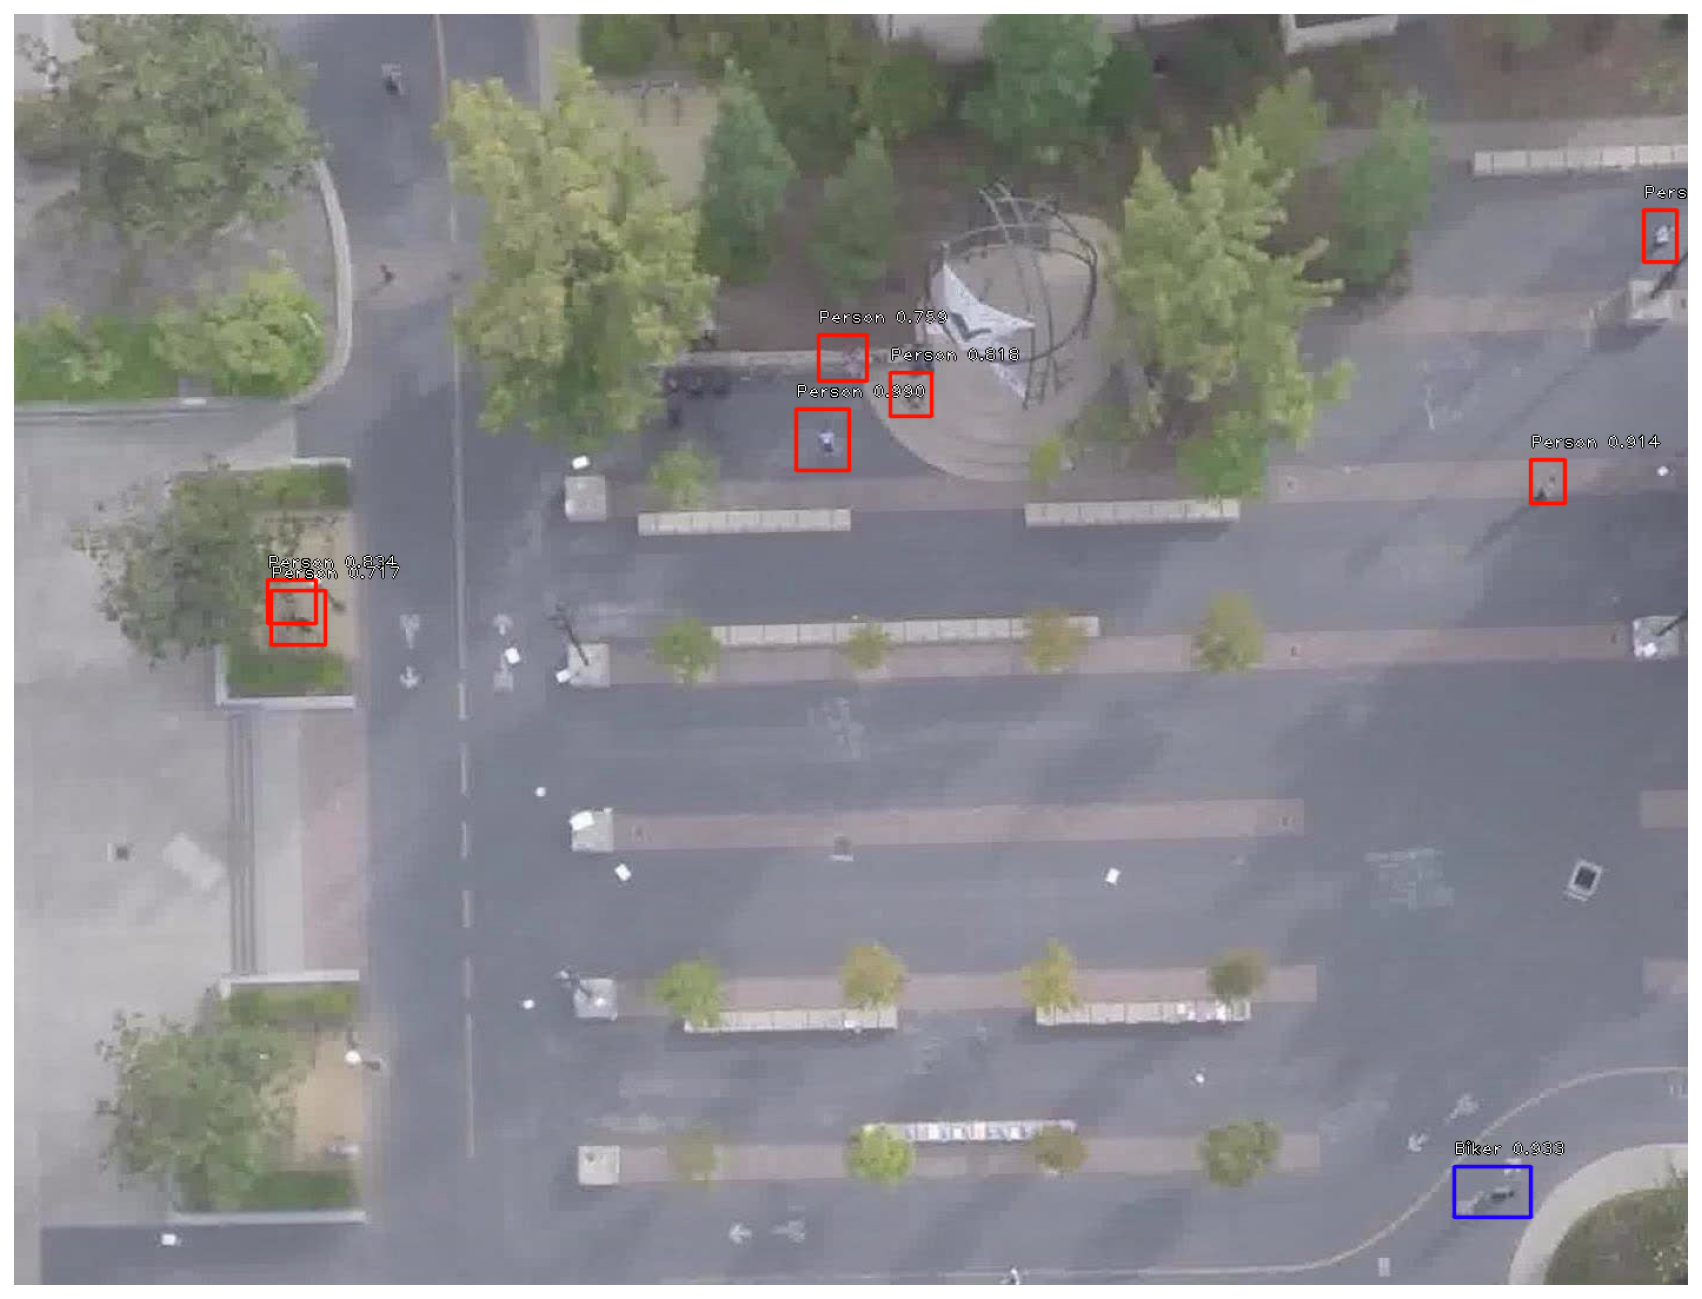

In [ ]:
annotations_file = 'test_annotations.csv'
cwd = os.getcwd()

image_names = []

with open (os.path.join(cwd, annotations_file)) as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\n')
    for row in readCSV:
        vals = row[0].split(',')
        this_filepath = vals[0]
        image_names.append(this_filepath)
        
## remove duplicates by taking a set
# imagePaths = list(set(image_names))
# print(len(imagePaths))

LABELS = open('classes.csv').read().strip().split('\n')
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}

# for(i, imagePath) in enumerate(imagePaths):
  
# filename = (imagePath.split(os.path.sep)[-1]).split('.')[0]
# output_file = os.path.sep.join(['humans', '{}.txt'.format(filename)])
# file = open(output_file, 'w')

image = read_image_bgr('imgs/val/bookstore_video1_3210.jpg' )

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
(boxes, scores, labels) = model.predict(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    row = " ".join([LABELS[label], str(score),
                      str(box[1]), str(box[0]), str(box[3]), str(box[2])])
    # file.write("{}\n".format(row))
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
# file.close()
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [160]:
annotations_file = 'test_annotations_sorted.csv'
cwd = os.getcwd()

image_names = []

with open (os.path.join(cwd, annotations_file)) as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\n')
    for row in readCSV:
        vals = row[0].split(',')
        this_filepath = vals[0]
        image_names.append(this_filepath)
        
## remove duplicates by taking a set
image_names = list(set(image_names))
print(len(image_names))

663


In [161]:
image_names.sort()

In [162]:
image_names

['imgs/test/bookstore_video1_10020.jpg',
 'imgs/test/bookstore_video1_10050.jpg',
 'imgs/test/bookstore_video1_10080.jpg',
 'imgs/test/bookstore_video1_10110.jpg',
 'imgs/test/bookstore_video1_10140.jpg',
 'imgs/test/bookstore_video1_10170.jpg',
 'imgs/test/bookstore_video1_10200.jpg',
 'imgs/test/bookstore_video1_10230.jpg',
 'imgs/test/bookstore_video1_10260.jpg',
 'imgs/test/bookstore_video1_10290.jpg',
 'imgs/test/bookstore_video1_10320.jpg',
 'imgs/test/bookstore_video1_10350.jpg',
 'imgs/test/bookstore_video1_10380.jpg',
 'imgs/test/bookstore_video1_10410.jpg',
 'imgs/test/bookstore_video1_10440.jpg',
 'imgs/test/bookstore_video1_10470.jpg',
 'imgs/test/bookstore_video1_10500.jpg',
 'imgs/test/bookstore_video1_10530.jpg',
 'imgs/test/bookstore_video1_10560.jpg',
 'imgs/test/bookstore_video1_10590.jpg',
 'imgs/test/bookstore_video1_10620.jpg',
 'imgs/test/bookstore_video1_10650.jpg',
 'imgs/test/bookstore_video1_10680.jpg',
 'imgs/test/bookstore_video1_10710.jpg',
 'imgs/test/book

In [163]:
score_threshold_retinanet = 0.8
acceptable_box_overlap = 0.5

In [164]:
def get_gt_annotations(filepath):
    gt_ann = []
    with open (os.path.join(cwd, annotations_file)) as csvfile:
        readCSV = csv.reader(csvfile, delimiter='\n')
        for row in readCSV:
            vals = row[0].split(',')
            this_filepath = vals[0]
            
            if this_filepath == filepath:
                record = []
                record.append(int(vals[1]))
                record.append(int(vals[2]))
                record.append(int(vals[3]))
                record.append(int(vals[4]))
                record.append(vals[5])
                
                gt_ann.append(record)
          
        if this_filepath == filepath:
            record = []
            record.append(int(vals[1]))
            record.append(int(vals[2]))
            record.append(int(vals[3]))
            record.append(int(vals[4]))
            record.append(vals[5])
              
            gt_ann.append(record)
    return gt_ann

In [165]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(int(boxA[0]), int(boxB[0]))
	yA = max(int(boxA[1]), int(boxB[1]))
	xB = min(int(boxA[2]), int(boxB[2]))
	yB = min(int(boxA[3]), int(boxB[3]))
 
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (int(boxA[2]) - int(boxA[0]) + 1) * (int(boxA[3]) - int(boxA[1]) + 1)
	boxBArea = (int(boxB[2]) - int(boxB[0]) + 1) * (int(boxB[3]) - int(boxB[1]) + 1)
 
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
 
	# return the intersection over union value
	return iou

In [166]:
def highest_iou(predicted_box, gt_ann):
    
    highest_iou = 0
    best_match = []
    for each_gt in gt_ann:
        this_iou = bb_intersection_over_union(predicted_box[:-1], each_gt[:-1])
#         print(" For this box is: ", this_iou)
        if this_iou > highest_iou:
            highest_iou = this_iou
            best_match = each_gt
            
    return highest_iou, best_match


In [171]:
def accuracy(gt_ann, predicted_ann):
    true_positive = []
    class_mismatch = []
    false_positive = []
    false_negative = []

    predicted_ann_copy = predicted_ann.copy()
    gt_ann_copy = gt_ann.copy()
    
    for each_pred in predicted_ann_copy:
        # 1. Calculate the highest_iou with any gt_box
        best_iou, best_gt_match = highest_iou(each_pred, gt_ann_copy)
#         print("Best IOU is: ", each_pred, best_gt_match, best_iou)
        
        ## If this box has a match
        if best_iou >= acceptable_box_overlap:
            ## if class label matches
            if best_gt_match[-1] == each_pred[-1]:
                ## This is a true positive
                true_positive.append(each_pred)
                ## remove this from predicted ann and gt
#                 print("Predicted Ann before:", predicted_ann)
                # ytest_2.append(lbls[0])
                # lbls.pop(0)
                predicted_ann.remove(each_pred)
#                 print("Predicted Ann after:", predicted_ann)
                if best_gt_match in gt_ann:
                    gt_ann.remove(best_gt_match)
            elif best_gt_match[-1] != each_pred[-1]:
                ## this is a class mismatch
                class_mismatch.append(each_pred)
                ## remove this box
                # ytest_2.append(lbls[0])
                # lbls.pop(0)
                predicted_ann.remove(each_pred)
                if best_gt_match in gt_ann:
                    gt_ann.remove(best_gt_match)
        
    ## If IOU is less than 0.5, leave as is

    ## Any predicted box is now false positive
    for remain_pred in predicted_ann:
        false_positive.append(remain_pred)
        # lbls.pop(0)
        # ytest_2.append('None')

    ## Any remaining gt box is false negative
    for remain_gt in gt_ann:
        if remain_gt[-1] in ['Biker','Bus', 'Car', 'Person']:
            false_negative.append(remain_gt)
            # ytest_2.append('None')

    return true_positive, class_mismatch, false_positive, false_negative

In [172]:
def run_detection_image(filepath):
    image = read_image_bgr(filepath)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale
    
    gt_ann = get_gt_annotations(filepath)
    num_gt_ann = len(gt_ann)
    
    predicted_ann = []
    lbls = []
    biker_cnt = 0
    bus_cnt = 0
    car_cnt = 0
    person_cnt = 0

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break

        if labels_to_names[label] == 'Biker':
          biker_cnt += 1
        if labels_to_names[label] == 'Bus':
          bus_cnt += 1
        if labels_to_names[label] == 'Car':
          car_cnt += 1
        if labels_to_names[label] == 'Person':
          person_cnt += 1

        if score < score_threshold_retinanet:
            break

        record = []
        record.append(int(box[0]))
        record.append(int(box[1]))
        record.append(int(box[2]))
        record.append(int(box[3]))
        record.append(labels_to_names[label])
        print("Record is: ", record)
        predicted_ann.append(record)
       
    ## Calculate boxes
    # print(len(lbls))
    true_positive, class_mismatch, false_positive, false_negative = accuracy(gt_ann, predicted_ann)
    print(len(true_positive), len(class_mismatch), len(false_positive), len(false_negative))
    
    
    return len(true_positive), len(class_mismatch), len(false_positive), len(false_negative), num_gt_ann, biker_cnt, bus_cnt, car_cnt, person_cnt

In [173]:
total_true_positive = 0
total_class_mismatch = 0
total_false_positive = 0
total_false_negative = 0
total_gt = 0

In [174]:
biker2 = 0
bus2 = 0
car2 = 0 
person2 = 0

for filepath in image_names:
    print(filepath)
    num_tp, num_cm , num_fp, num_fn, num_gt, biker, bus, car, person = run_detection_image(filepath)
    print("Ground Truth: ", num_gt)
    total_true_positive += num_tp
    total_class_mismatch += num_cm
    total_false_positive += num_fp
    total_false_negative += num_fn
    total_gt += num_gt
    biker2 += biker
    bus2 += bus
    car2 += car
    person2 += person

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Record is:  [575, 338, 671, 408, 'Person']
Record is:  [1333, 108, 1386, 141, 'Person']
Record is:  [1284, 156, 1338, 192, 'Person']
Record is:  [949, 927, 1018, 981, 'Person']
Record is:  [1286, 53, 1333, 89, 'Person']
Record is:  [1283, 88, 1333, 117, 'Person']
Record is:  [1334, 145, 1371, 174, 'Person']
Record is:  [1409, 158, 1462, 190, 'Person']
Record is:  [1149, 859, 1283, 944, 'Biker']
Record is:  [1445, 734, 1515, 778, 'Person']
0
14 0 0 0
Ground Truth:  14
imgs/test/coupa_video3_10650.jpg
processing time:  0.07648062705993652
Record is:  [574, 334, 673, 407, 'Person']
Record is:  [913, 905, 981, 973, 'Person']
Record is:  [1288, 118, 1338, 152, 'Person']
Record is:  [1445, 111, 1497, 149, 'Person']
Record is:  [1331, 108, 1385, 143, 'Person']
Record is:  [1410, 154, 1462, 192, 'Person']
Record is:  [1283, 156, 1335, 192, 'Person']
Record is:  [1280, 53, 1332, 90, 'Person']
Record is:  [793, 365, 883, 439, 'Person']
Recor

In [175]:
print(biker2, bus2, car2, person2)

1062 23 25 5411


In [183]:
print(biker2 + bus2 + car2 + person2)

6521


In [106]:
print(total_true_positive, total_class_mismatch, total_false_positive, total_false_negative, total_gt)

5222 37 599 1611 6868


In [147]:
precision = total_true_positive/(total_true_positive+total_false_positive)

recall = total_true_positive/(total_true_positive+ total_false_negative)

f1_score = 2*(precision * recall)/(precision + recall)

accuracy = (total_true_positive ) / (total_true_positive+total_false_positive+total_false_negative)

print(precision, recall, f1_score,accuracy)

0.8970967187768425 0.7642324015805649 0.8253516674569307 0.7026372443487621


In [114]:
len(y_test2)

663

In [151]:
predictions = []
for sublist in y_test2:
    for item in sublist:
        predictions.append(item)

In [152]:
print(len(predictions))

663


In [149]:
predictions2 = []
for sublist in predictions:
    for item in sublist:
        predictions2.append(item)

In [150]:
len(predictions2)

12728

In [ ]:
cols = ["Class"]
df = pd.read_csv("classes.csv",usecols=cols)

In [ ]:
tmp = df.values.tolist()
print(tmp)

[['Biker'], ['Bus'], ['Car'], ['Person']]


In [ ]:
tm = []
for sublist in tmp:
    for item in sublist:
        tm.append(item)

In [ ]:
print(tm)

['Biker', 'Bus', 'Car', 'Person']


In [ ]:
print(len(actual))

6867


In [ ]:
predictions2.pop(-1)

'Person'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predictions2)

array([[  93,    2,    0,  285,  824],
       [   2,    0,    0,   13,   19],
       [   8,    0,    0,   25,   38],
       [   0,    0,    0,    0,    0],
       [ 478,   20,   11, 1286, 3763]])

In [ ]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

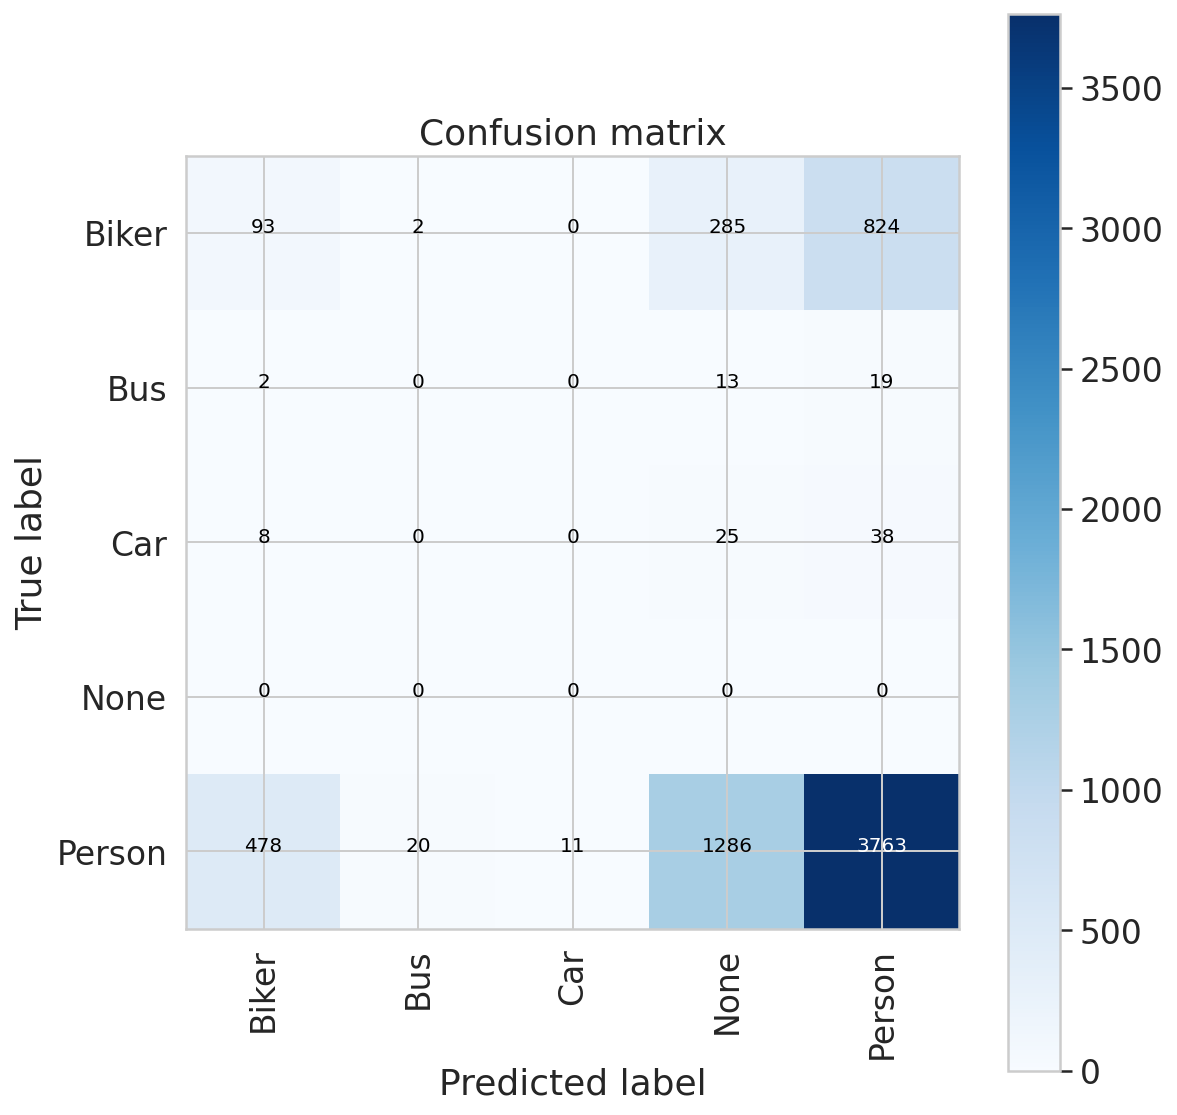

In [ ]:
plot_confusion_matrix(ct, t)


In [ ]:
!keras_retinanet/bin/evaluate.py --config config.ini --iou-threshold 0.5 --score-threshold 0.8 csv test_annotations.csv classes.csv snapshots/resnet50_csv_85.h5 --convert-model

2021-06-15 16:15:24.777219: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Loading model, this may take a second...
2021-06-15 16:15:26.786266: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-15 16:15:26.791614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-15 16:15:26.792280: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-06-15 16:15:26.792328: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.